# <font color="maroon">Chapter 5: Anatomy of pyDIFRATE</font>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/ColabNotebooks/Ch5_pyDRstruct.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

pyDR uses extensive application of object-oriented programming in order to streamline detector analysis and ensure that data is correctly treated. The central object in pyDR is the 'data' object, which naturally contains dynamics data, but also contains all the other information about that data, and functions/objects for processing. Data can be stored within a project, and data is created via loading NMR data from text or from processing MD data. The program structure is summarized in the figure below (although this is far from a comprehensive description). This tutorial investigates some of the components of pyDR, and discusses how they work together to create a simplified user experience.

Note that [*objects*](https://en.wikipedia.org/wiki/Object_(computer_science)) are shown in boxes, whereas [functions](https://en.wikipedia.org/wiki/Function_(computer_programming)) are not. As one sees, most components of pyDR take advantage of [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming).

![pyDR program structure](https://raw.githubusercontent.com/alsinmr/pyDR_tutorial/main/JupyterBook/pyDR_structure.png)

## The Data Object
Central to pyDR functionality is the data object, which is responsible for storage of experimental and simulated data, as well as data produced by detector analysis. We will select a data object out of a recent project investigating Growth Hormone Secretagogue Receptor using MD simulation ([source](https://doi.org/10.1002/anie.202302003)). 

In [0]:
# SETUP pyDR
import os
os.chdir('..')
import sys
sys.path.append('../') # Path to pyDR location

In [2]:
#Imports
import pyDR

In [3]:
#Load a project
proj=pyDR.Project('../GHSR_archive/Projects/backboneHN/')
data=proj[-2]  #Select a particular data object

### Data in the data object
Data can be found in data.R, with its standard deviation in data.Rstd. For NMR data, we may have $S^2$ data as well (data.S2,data.S2std). These fields are MxN, where M is the number of different locations in the simulation, and N is the number of data points (detectors, experiments, time points) for each location

In [12]:
print('Experimental data')
print(data.R)
print('Standard Deviation')
print(data.Rstd)

Experimental data
[[3.7942290e-01 2.1657662e-01 2.0262545e-01 ... 1.4402686e-01
  1.3009402e-01 5.9126038e-02]
 [2.5403091e-01 1.9350898e-01 2.0336972e-01 ... 1.8837723e-01
  2.1296179e-01 7.7475399e-02]
 [1.9356659e-01 1.3584794e-01 1.8840416e-01 ... 2.7771801e-01
  2.2354510e-01 1.0986746e-01]
 ...
 [9.7813830e-02 1.2932412e-02 1.8070474e-02 ... 6.8756002e-03
  7.5943240e-07 8.7012476e-01]
 [1.0092438e-01 1.7791813e-02 2.7242884e-02 ... 4.0566847e-02
  6.9016963e-03 8.2861245e-01]
 [2.8222382e-01 3.0010650e-01 2.3420739e-01 ... 4.6467399e-03
  3.1937913e-07 3.5440496e-01]]
Standard Deviation
[[0.00086905 0.00158777 0.00125429 ... 0.00130778 0.0014115  0.00074924]
 [0.00086905 0.00158777 0.00125429 ... 0.00130778 0.0014115  0.00074924]
 [0.00086905 0.00158777 0.00125429 ... 0.00130778 0.0014115  0.00074924]
 ...
 [0.00086905 0.00158777 0.00125429 ... 0.00130778 0.0014115  0.00074924]
 [0.00086905 0.00158777 0.00125429 ... 0.00130778 0.0014115  0.00074924]
 [0.00086905 0.00158777 0.001

### Sensitivity of the data object
Each data point in a simulation has its own sensitivity. To know the significance of a data point, we naturally need to know the sensitivity of each data point, so it makes sense to always store the sensitivity object along with the data object. Here, it is found in data.sens. A few key components are found in the sensitivity object.
```
.tc        correlation time vector (default 10 fs to 1 ms)
.z         log-correlation time (default -14 to -3)
.rhoz      Sensitivity of the data as a function of correlation time
           (NxM, where N is the number of data points, M is the number of times in the correlation time axis)
.plot_rhoz Plots rhoz vs. tc
.info      Parameters describing (or used to calculate) the sensitivities
.Detector  Produces a detector object from the sensitivity object
```
Here, we plot the sensitivity of the data for example

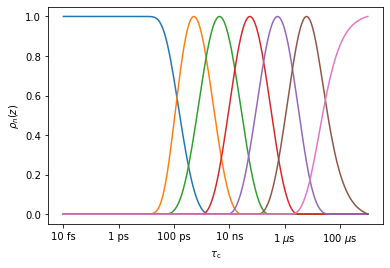

In [13]:
_=data.sens.plot_rhoz()

We see that there are seven detectors space from below (\~100 ps) to above (\~3 $\mu$s). From sens.info, we can find out the mean position of the detectors (here, we convert from the log scale to ns). Note that the first and last detector do not really have a mean position, since they remain positive for arbitrarily short/long correlation times, respectively

In [19]:
for k,z0 in enumerate(data.sens.info['z0']):
    print(f'rho{k}: ~ {10**z0*1e9:.2} ns')

rho0: ~ 0.0013 ns
rho1: ~ 0.58 ns
rho2: ~ 4.3 ns
rho3: ~ 5.5e+01 ns
rho4: ~ 5.3e+02 ns
rho5: ~ 7e+03 ns
rho6: ~ 1.4e+05 ns


The sens.info object is particularly useful in summarizing relevant parameters for the sensitivity of a given data object. It is also accessible via data.info. Note that sens.info for an NMR or MD sensitivity yields parameters from which the sensitivities may be calculated, whereas for detectors, sens.info only characterizes the sensitivities, but cannot calculation them. We show below the sensitivity of this data (detectors), but also create an NMR sensitivity object, and show info, to highlight the different.

In [22]:
print('Info for detector:')
print(data.info)
nmr=pyDR.Sens.NMR(Nuc='15N',Type='R1',v0=[400,600,800])
print('\n\nInfo for NMR sensitivity:')
print(nmr.info)

Info for detector:
                 0           1           2           3           4           5           6
z0      -11.887198  -9.2347894  -8.3647531  -7.2601854  -6.2729486  -5.1564855  -3.8648295
zmax    -12.728643  -9.3015075  -8.3618090  -7.2562814  -6.2613065  -5.2110552        -3.0
Del_z   4.24162168  1.46730976  1.65835556  1.60612970  1.62059535  1.61260870  1.61039228
stdev   0.00150523  0.00275009  0.00217250  0.00231370  0.00226514  0.00244478  0.00129772

[7 experiments with 4 parameters]


Info for NMR sensitivity:
                 0         1         2
Type            R1        R1        R1
v0             400       600       800
v1               0         0         0
vr               0         0         0
offset           0         0         0
stdev            0         0         0
med_val          0         0         0
Nuc            15N       15N       15N
Nuc1            1H        1H        1H
dXY       -22954.8  -22954.8  -22954.8
CSA          113.0     113.0     1

### Detectors for the data object
The next critical point component of the data object is the Detector object (data.detect). The detector object provides the instructions on how to fit the data (when calling data.fit()). The detector object is derived from the sensitivity object (data.detect=data.sens.Detector), and the detector object always contains the original data object. We can demonstrate this below.

In [25]:
# Demonstrate that the detector object contains the sensitivity object
print('Is the detector object\'s sensitivity the same and the sensitivity of the data?')
print(data.sens is data.detect.sens)
# Produce the detector object from the sensitivity object
r=data.sens.Detector() #Produce a detector object from a sensitivity object

Is the detector object's sensitivity the same and the sensitivity of the data?
True


Then, the detector object can be optimized in a variety of ways for data analysis. However, it is not recommended to re-analyze data that has already been analyzed with detectors *unless* un-optimized detectors have been used. Then, we will demonstrate based on the original sensitivity object for this data set. It has gone through two layers of processing, so we have to go two sensitivities back.

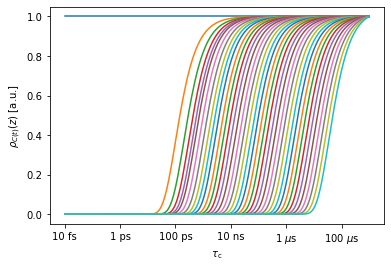

In [14]:
sens=data.sens.sens.sens
_=sens.plot_rhoz()

An analysis starts, then, by creating a detector object from the sensitivity object. pyDR does this automatically when a data object is created, so you don't have to do it (data.detect=data.sens.Detector()). However, here, we have to do this step ourselves.

In [16]:
r0=sens.Detector()

For NMR data, we usually just optimize the detectors with 'detect.r_auto', but for MD, we often take an intermediate step, using detect.r_no_opt()

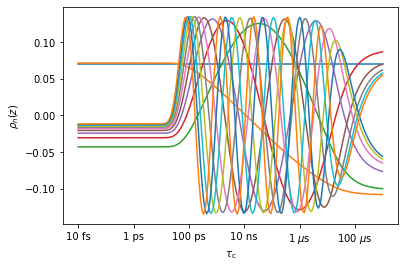

In [27]:
r0.r_no_opt(12)     #Create detectors with r_no_opt, using 12 detectors
_=r0.plot_rhoz()    #Plot the result

The raw correlation function data can be fitted with the *unoptimized* detectors and stored, which vastly reduces the data size, but loses very little correlation time information. In a subsequent step, one can use 'r_auto'. Once data has been processed with detectors using 'r_auto' or 'r_target', the data should ideally not be reprocessed.

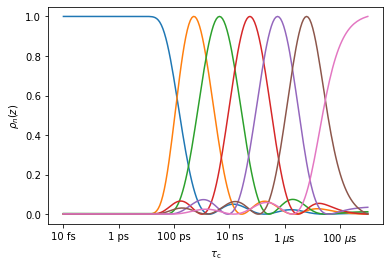

In [26]:
r1=r0.Detector()  #Create another detector
r1.r_auto(7)      #Create 7 optimized detectors
_=r1.plot_rhoz()  #Plot the results

It is important to note: we get the same detectors going directly from MD data to optimized detector windows as if we go via two steps, using unoptimized detector windows in between. We demonstrate this below:

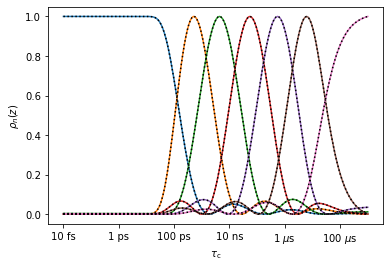

In [29]:
r2=sens.Detector() #Detectors generated from the original sensitivity
r2.r_auto(7)       #Create 7 optimized detectors
ax=r2.plot_rhoz()[0].axes #Plot the result
_=r1.plot_rhoz(ax=ax,color='black',linestyle=':')  #Overlay the results

### Fitting results in the data object